<h1 style="background-color:DodgerBlue;"> Anamoly detection || Machine Learning:: ABOD</h1>

## 💳 **Project: Credit Card Spending Pattern Anomaly Detection (ABOD)**

### 🧠 **Goal**  
Use Angle-Based Outlier Detection (ABOD) to detect **unusual cardholder behavior**, such as:
- Abnormal refund patterns
- Unusual frequency of transactions
- Spending pattern shifts on weekends

## 🧪 **1. Get  Review Data**

In [1]:
import pandas as pd
import numpy as np
from pyod.models.abod import ABOD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate normal data
num_normal = 300
review_lengths = np.random.normal(loc=100, scale=20, size=num_normal)
sentiment_scores = np.random.normal(loc=0.7, scale=0.1, size=num_normal)
ratings = np.random.normal(loc=4, scale=0.5, size=num_normal)

# Generate anomalies
num_anomalies = 10
anomalous_review_lengths = np.random.normal(loc=10, scale=3, size=num_anomalies)
anomalous_sentiments = np.random.normal(loc=0.1, scale=0.05, size=num_anomalies)
anomalous_ratings = np.random.normal(loc=1, scale=0.3, size=num_anomalies)

# Combine data
review_lengths = np.concatenate([review_lengths, anomalous_review_lengths])
sentiment_scores = np.concatenate([sentiment_scores, anomalous_sentiments])
ratings = np.concatenate([ratings, anomalous_ratings])
is_anomaly = np.array([0]*num_normal + [1]*num_anomalies)

# Create DataFrame
df = pd.DataFrame({
    'review_length': review_lengths,
    'sentiment_score': sentiment_scores,
    'rating': ratings,
    'is_anomaly': is_anomaly
})
df.head()

,review_length,sentiment_score,rating,is_anomaly
0,109.934283,0.617100,4.378494,0
1,97.234714,0.643982,3.538917,0
2,112.953771,0.774729,4.434803,0
3,130.460597,0.761037,4.677819,0
4,95.316933,0.697910,4.206717,0


In [2]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['review_length', 'sentiment_score', 'rating']])

## 🧠 **2. Fit ABOD Model**

In [3]:

# Initialize and fit ABOD model
model = ABOD()
model.fit(X_scaled)

# Predict anomalies
df['abod_anomaly'] = model.labels_
df['abod_scores'] = model.decision_scores_


## 📊 **3. Visualize the Outliers**

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


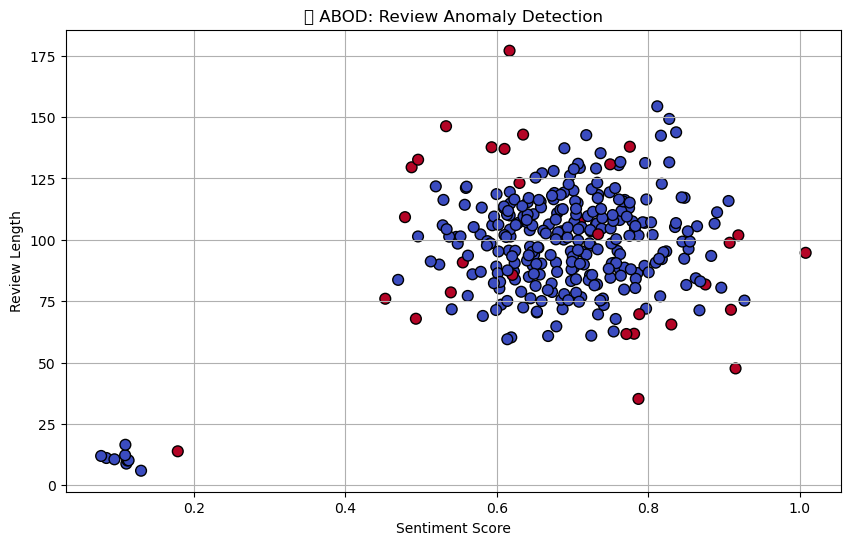

In [4]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['sentiment_score'], df['review_length'], 
            c=df['abod_anomaly'], cmap='coolwarm', edgecolor='k', s=60)
plt.title("📌 ABOD: Review Anomaly Detection")
plt.xlabel("Sentiment Score")
plt.ylabel("Review Length")
plt.grid(True)
plt.show()

## 💾 **4. Export Detected Anomalies**

In [5]:
# Save anomalies to CSV
anomalies = df[df['abod_anomaly'] == 1]
anomalies.to_csv("abod_detected_anomalies.csv", index=False)
print(f"✅ Exported {len(anomalies)} anomalies to 'abod_detected_anomalies.csv'")

✅ Exported 31 anomalies to 'abod_detected_anomalies.csv'


## 🧪 **5. Test with a New Anomalous Review Sample**

In [6]:
# Create new synthetic anomalous review
test_review = pd.DataFrame([{
    'review_length': 5,
    'sentiment_score': 0.05,
    'rating': 1
}])

# Scale using previous scaler
X_test = scaler.transform(test_review)

# Predict
prediction = model.predict(X_test)[0]
print("🧪 Test Review Anomaly Prediction:", "Anomaly" if prediction == 1 else "Normal")

🧪 Test Review Anomaly Prediction: Anomaly


## ✅ Summary

- We used **ABOD** to detect anomalous product reviews based on **review length**, **sentiment score**, and **rating**.
- Outliers are flagged based on the angular deviation of their neighbors — great for high-dimensional data!
- Detected anomalies were exported to CSV, and we tested the model on a new suspicious review.

In [ ]:
Great idea! 🧪 Let's build an **ABOD-based anomaly detection project** for **credit card spending behavior**, using a realistic and **high-dimensional synthetic dataset** based on your scenario.

---



---

## 🧪 **1. Generate Synthetic Credit Card Spending Data**

```python
import pandas as pd
import numpy as np
from pyod.models.abod import ABOD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Normal customer behavior (500 users)
num_normal = 500
daily_avg_spend = np.random.normal(200, 50, num_normal)
transactions_per_day = np.random.normal(5, 2, num_normal)
avg_transaction_amount = daily_avg_spend / transactions_per_day
refund_ratio = np.random.normal(0.05, 0.02, num_normal)
weekend_spend_ratio = np.random.normal(0.3, 0.1, num_normal)
international_txn_ratio = np.random.normal(0.1, 0.05, num_normal)

# Anomalous behavior (e.g., fraud, bots)
num_anomalies = 15
daily_avg_spend_anom = np.random.normal(800, 50, num_anomalies)
transactions_per_day_anom = np.random.normal(20, 5, num_anomalies)
avg_transaction_amount_anom = daily_avg_spend_anom / transactions_per_day_anom
refund_ratio_anom = np.random.normal(0.5, 0.1, num_anomalies)
weekend_spend_ratio_anom = np.random.normal(0.9, 0.05, num_anomalies)
international_txn_ratio_anom = np.random.normal(0.8, 0.1, num_anomalies)

# Combine
df = pd.DataFrame({
    'daily_avg_spend': np.concatenate([daily_avg_spend, daily_avg_spend_anom]),
    'transactions_per_day': np.concatenate([transactions_per_day, transactions_per_day_anom]),
    'avg_transaction_amount': np.concatenate([avg_transaction_amount, avg_transaction_amount_anom]),
    'refund_ratio': np.concatenate([refund_ratio, refund_ratio_anom]),
    'weekend_spend_ratio': np.concatenate([weekend_spend_ratio, weekend_spend_ratio_anom]),
    'international_txn_ratio': np.concatenate([international_txn_ratio, international_txn_ratio_anom]),
    'is_anomaly': [0]*num_normal + [1]*num_anomalies
})

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns='is_anomaly'))
```

---

## 🤖 **2. Fit ABOD and Detect Anomalies**

```python
# Initialize and fit ABOD
abod = ABOD()
abod.fit(X_scaled)

# Predict anomalies
df['abod_anomaly'] = abod.labels_
df['abod_score'] = abod.decision_scores_
```

---

## 📊 **3. Visualize Anomalies in 2D Projection (PCA optional)**

```python
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='abod_anomaly', palette='coolwarm', s=60, edgecolor='k')
plt.title("💳 ABOD - Credit Card Spending Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title='Anomaly')
plt.tight_layout()
plt.show()
```

---

## 💾 **4. Export Anomalies to CSV**

```python
anomalies = df[df['abod_anomaly'] == 1]
anomalies.to_csv("abod_credit_card_anomalies.csv", index=False)
print(f"✅ Exported {len(anomalies)} anomalies to 'abod_credit_card_anomalies.csv'")
```

---

## 🧪 **5. Test the ABOD Model on a New Row**

```python
# Simulate a suspicious new session
test_sample = pd.DataFrame([{
    'daily_avg_spend': 900,
    'transactions_per_day': 30,
    'avg_transaction_amount': 30,
    'refund_ratio': 0.7,
    'weekend_spend_ratio': 0.95,
    'international_txn_ratio': 0.85
}])

# Scale it
X_test = scaler.transform(test_sample)

# Predict
is_anomaly = abod.predict(X_test)[0]
print("🔍 New test session prediction:", "Anomaly" if is_anomaly else "Normal")
```

---

## ✅ **Summary**

- 💳 **Use Case**: Credit Card Spending Pattern Analysis
- 📊 **Features**: 6 real-world behavioral metrics
- 🚩 **Goal**: Spot odd financial behavior (fraud, bots, etc.)
- 🧠 **Model**: ABOD from PyOD
- 🧪 **Tested** with a synthetic anomalous transaction
- 💾 **Exported** detected anomalies for review

Would you like this packed as a Jupyter Notebook or merged into your previous reports?